### 爬取

In [1]:
# https://github.com/HKeai/Damn_Data 
from damndata.damn_geoSpider import geoautonavi, urlgrid
import pandas as pd

ModuleNotFoundError: No module named 'damndata'

In [2]:
types = ['200000']
geocoor = [121.467358,31.220975,121.539112,31.260016] #bottomleft, topright #上海
url_collection = urlgrid.urlcreator_types(types, geocoor, grid=(0.02, 0.02))

In [3]:
for typei in types:
    for i,url in enumerate(url_collection[typei]):
        pois = geoautonavi.getpois(url)
        geoautonavi.write_to_csv(pois,typei+'_'+str(i)+'.csv')
        print(typei+'_'+str(i),':',url)

200000_0 : restapi.amap.com/v3/place/polygon?key=eee22b58b181b863821917e41d18616e&polygon=121.467358,31.220975|121.487358,31.240975&types=200000&offset=25&extensions=all&page=
200000_1 : restapi.amap.com/v3/place/polygon?key=bcdef3123d528464de594c34da06cf0f&polygon=121.467358,31.240975|121.487358,31.260975&types=200000&offset=25&extensions=all&page=
200000_2 : restapi.amap.com/v3/place/polygon?key=29e7b36fa181e34214fe567d0d19025e&polygon=121.487358,31.220975|121.507358,31.240975&types=200000&offset=25&extensions=all&page=
200000_3 : restapi.amap.com/v3/place/polygon?key=a30c4aa6399eff6a0310c032898d3af9&polygon=121.487358,31.240975|121.507358,31.260975&types=200000&offset=25&extensions=all&page=
200000_4 : restapi.amap.com/v3/place/polygon?key=48fd2b1a8257f0fec1ab5980be3b64a0&polygon=121.507358,31.220975|121.527358,31.240975&types=200000&offset=25&extensions=all&page=
200000_5 : restapi.amap.com/v3/place/polygon?key=eee22b58b181b863821917e41d18616e&polygon=121.507358,31.240975|121.52735

### 可视化

In [4]:
import pandas as pd
import os
poi_filelist = []
for filename in os.listdir(os.getcwd()):
    if filename.endswith('.csv'):
        poi_filelist.append(filename)
        
csv_0 = pd.read_csv(poi_filelist[0],index_col='Unnamed: 0')[['id','wgslng','wgslat']]
csv_0['type']=poi_filelist[0].split('_')[0]
for i in range(1,len(poi_filelist)):
    csv_i = pd.read_csv(poi_filelist[i],index_col='Unnamed: 0')[['id','wgslng','wgslat']]
    csv_i['type']=poi_filelist[i].split('_')[0]
    csv_0 = pd.concat([csv_0,csv_i],axis=0)
    csv_0.reset_index(drop=True,inplace=True)

In [5]:
from damndata.damn_geoBee.hotgrid import HotGridGenerator
hg = HotGridGenerator(gridUnit = 200, searchRadius = 200)
hg.grid_setting(csv_0,'wgslat','wgslng')
poi_hotMap=hg.gridCounting_basic(csv_0,'wgslat','wgslng')

<AxesSubplot:>

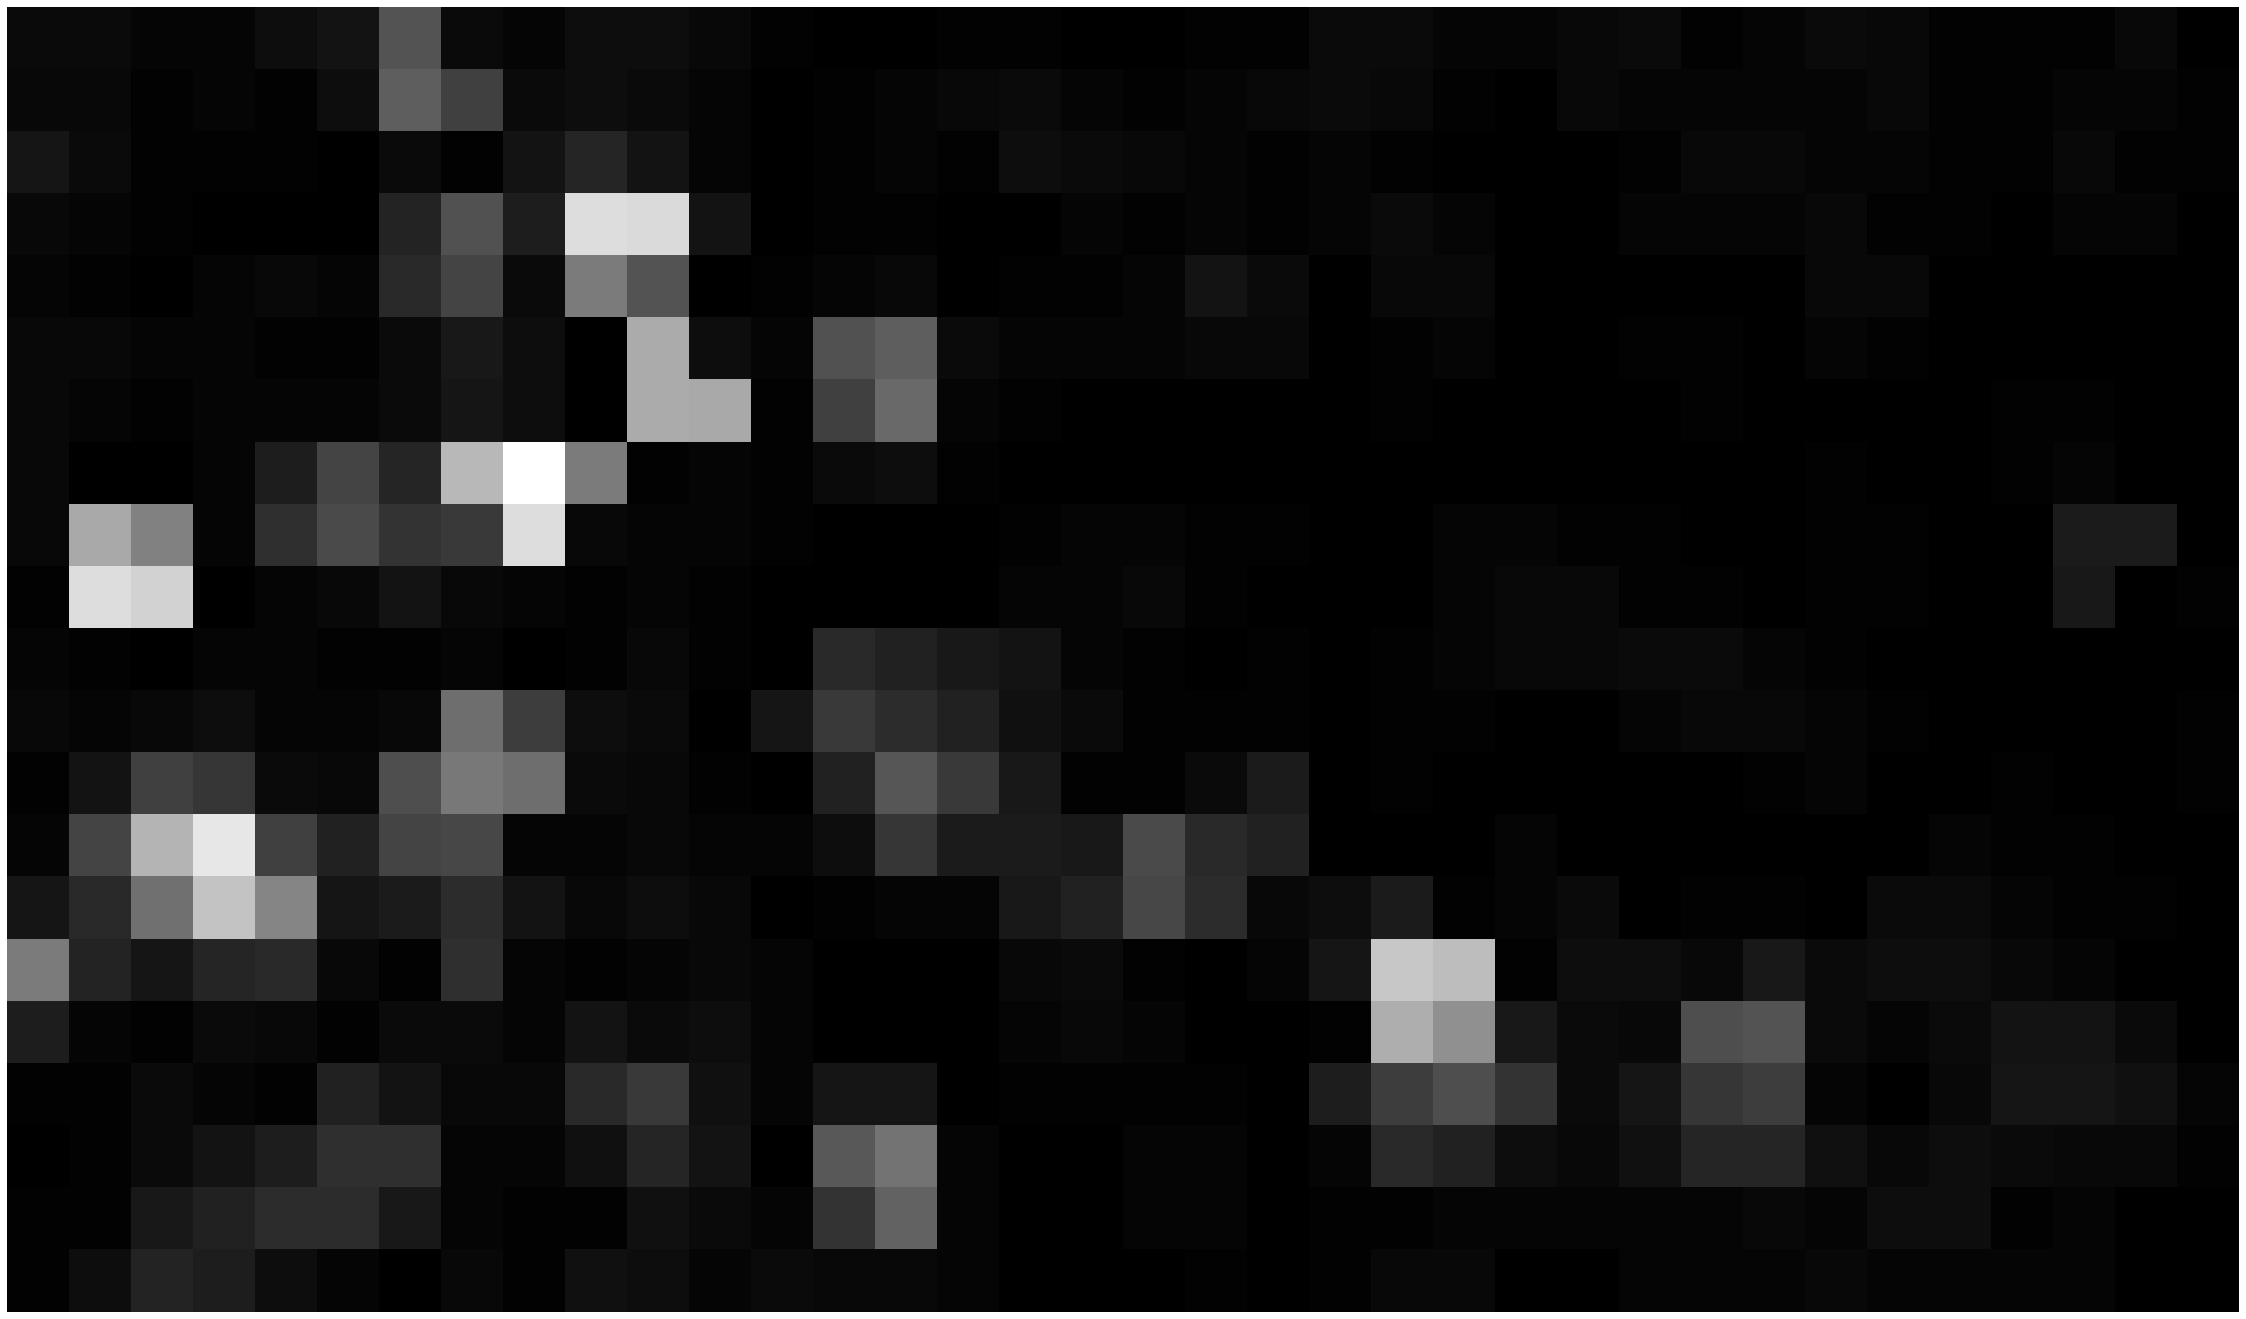

In [8]:
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(40,24)
sns.heatmap(poi_hotMap.sort_index(axis=0,ascending=False),cmap='Greys_r', cbar=False, xticklabels=False, yticklabels=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


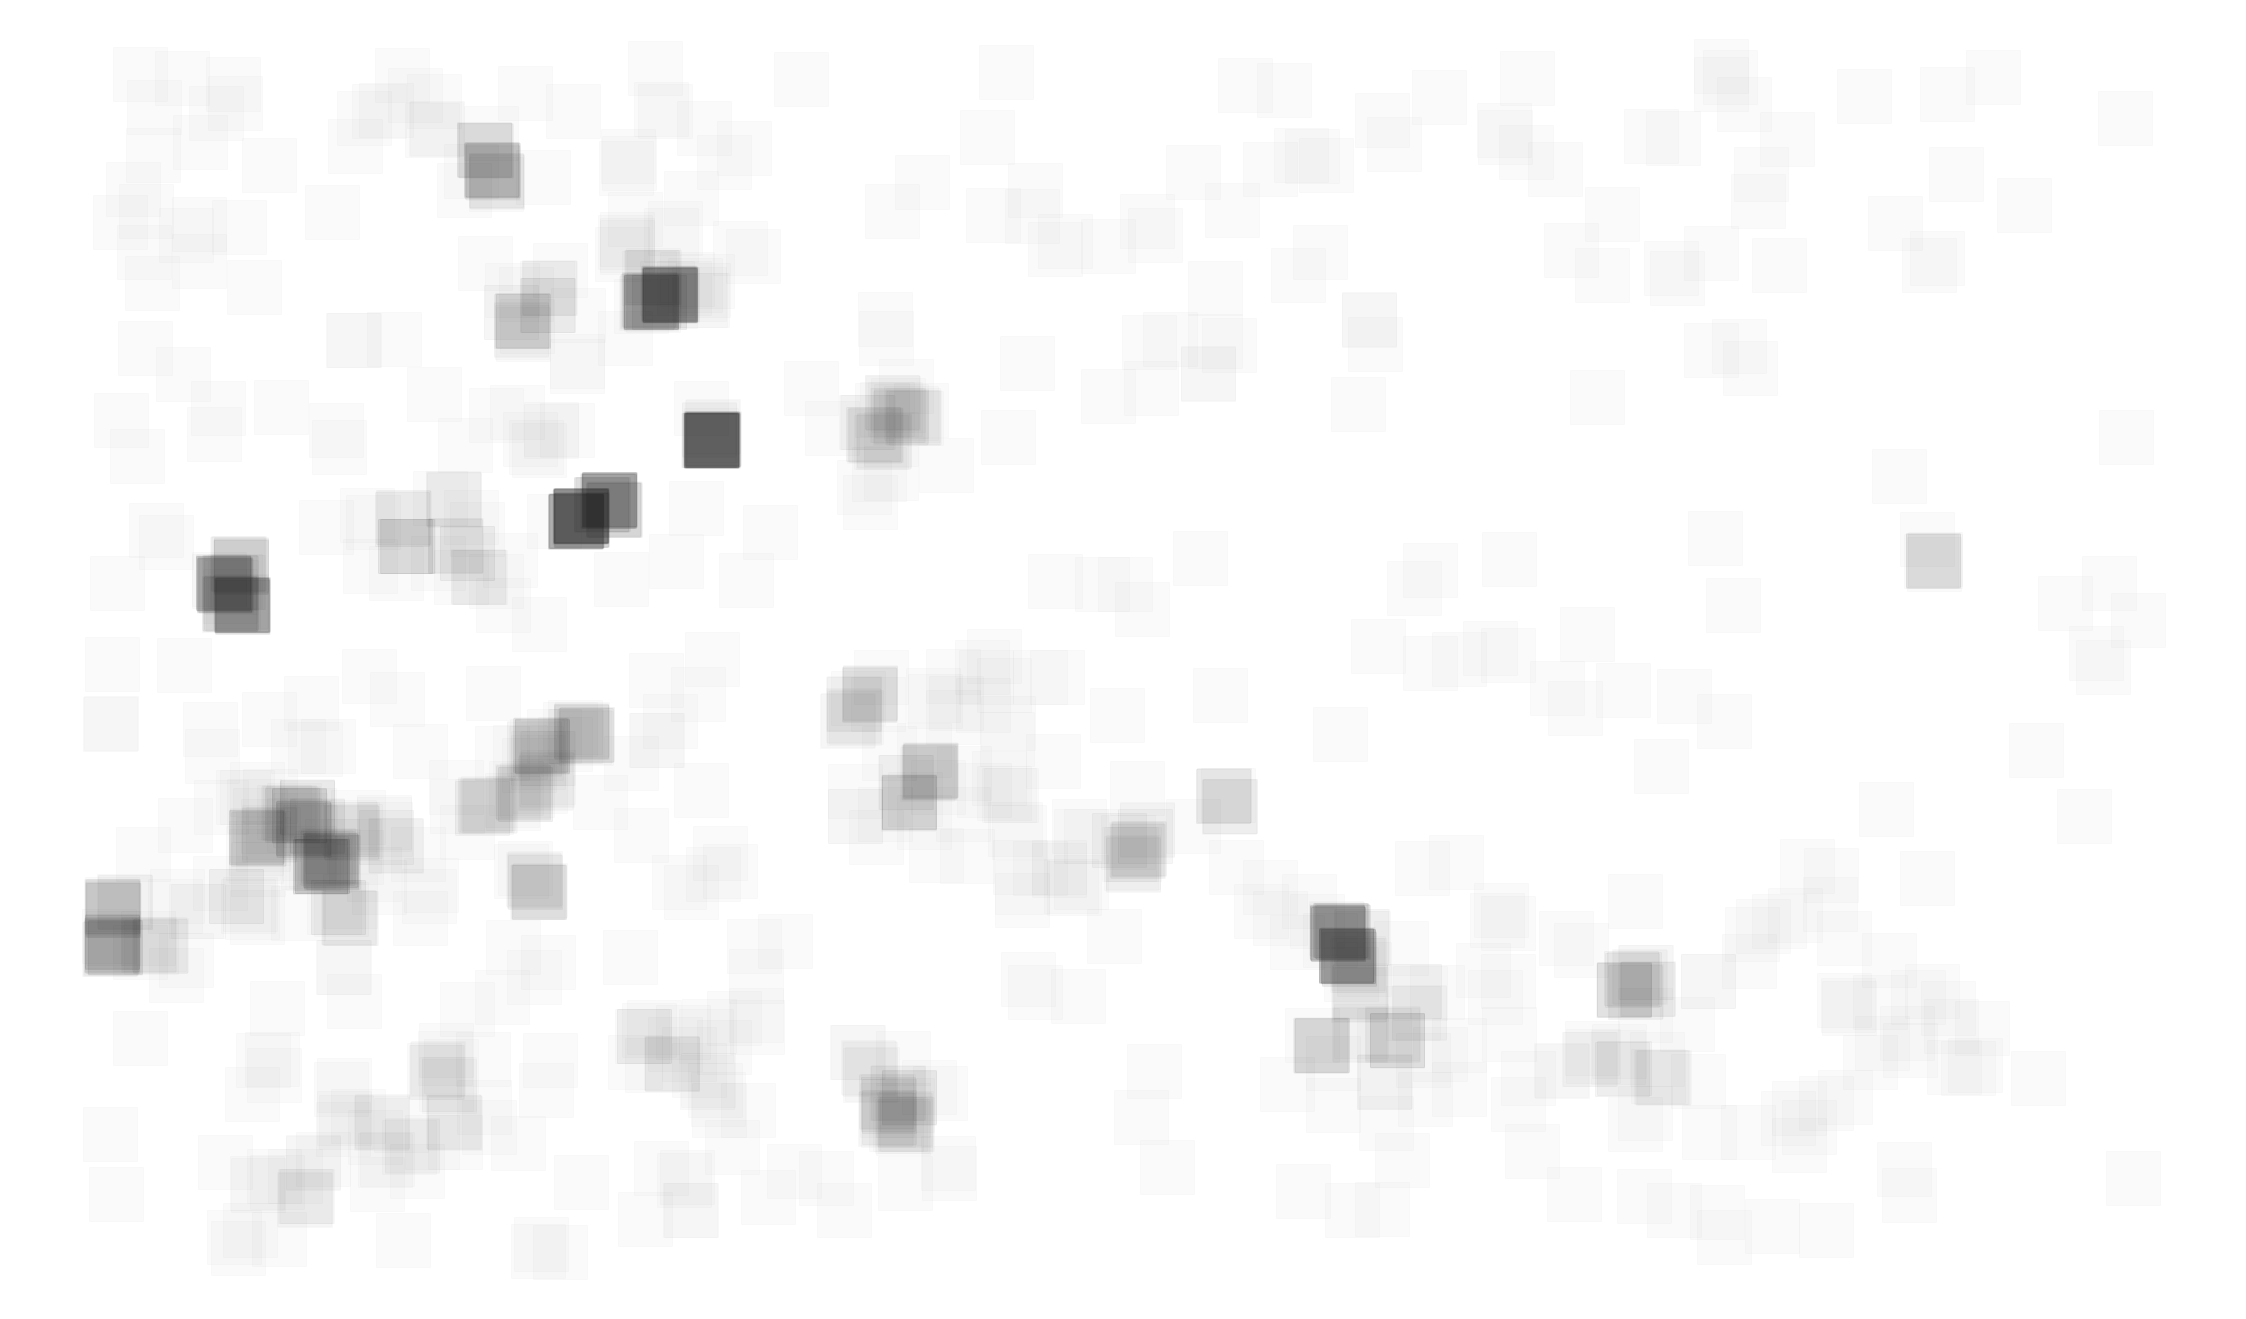

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize(40,24)
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.axis('off')  #去掉坐标轴
plt.scatter(csv_0['wgslng'],csv_0['wgslat'],c=[0,0,0,0.02],s=3000,marker='s',edgecolors = 'face',)